In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import PowerTransformer

In [6]:
df = pd.read_csv('project_2_data.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Use Parametric test to know Is there a statistically significant difference among the different categories of ‘GarageFinish’ in terms of average ‘SalePrice’ amount?

Assume Alpha is 0.05

Parametric assumptions:

1. Normality – Data in each group should be normally distributed.
2. Equal Variance – Data in each group should have approximately equal variance.
3. Independence – The observations in each group are independent of each other and the observations within groups were obtained by a random sample.
4. No Outliers – There should be no extreme outliers.



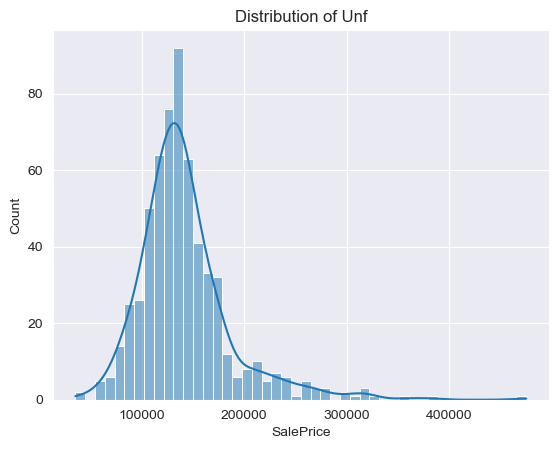

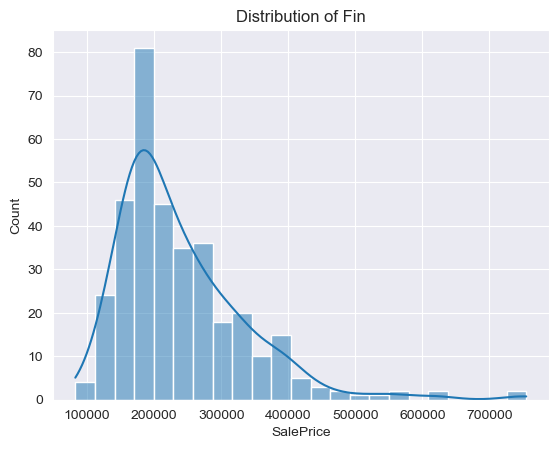

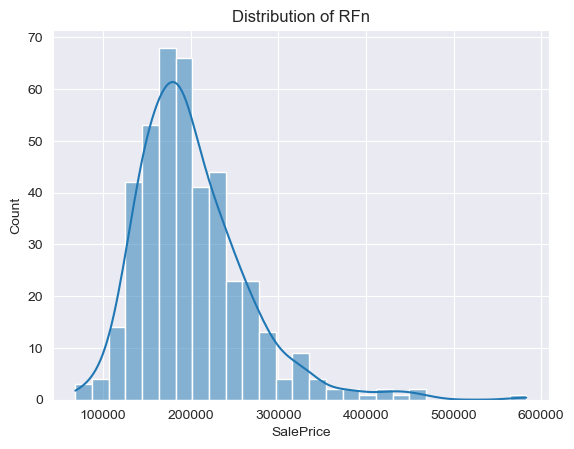

In [8]:
# Normality
Fin = df[df['GarageFinish']== 'Fin']['SalePrice']
RFn = df[df['GarageFinish']== 'RFn']['SalePrice']
Unf = df[df['GarageFinish']== 'Unf']['SalePrice']

plt.figure()
sns.histplot(Unf, kde=True)  
plt.title('Distribution of Unf')
plt.show()

# Plot 2: Distribution for 'Fin'
plt.figure()
sns.histplot(Fin, kde=True)
plt.title('Distribution of Fin')
plt.show()

# Plot 3: Distribution for 'RFn'
plt.figure()
sns.histplot(RFn, kde=True)
plt.title('Distribution of RFn')
plt.show()

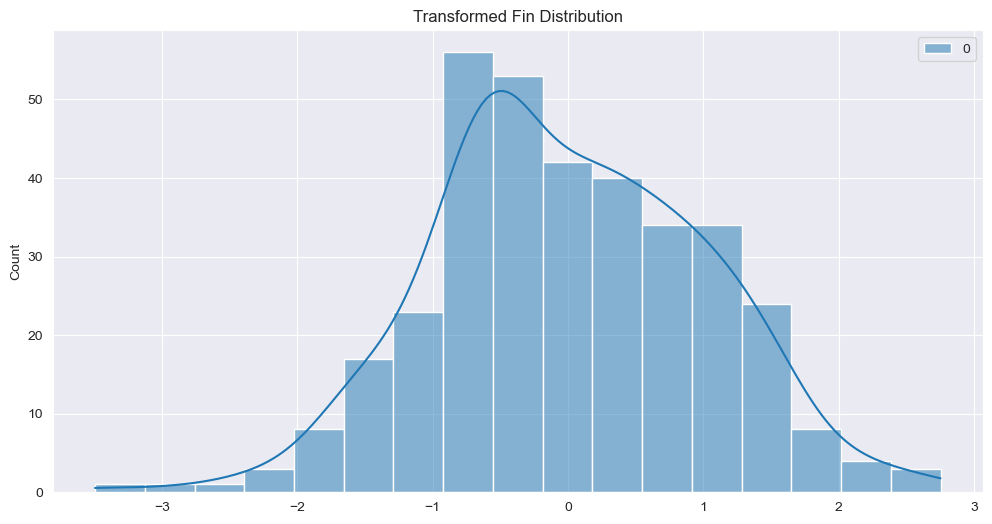

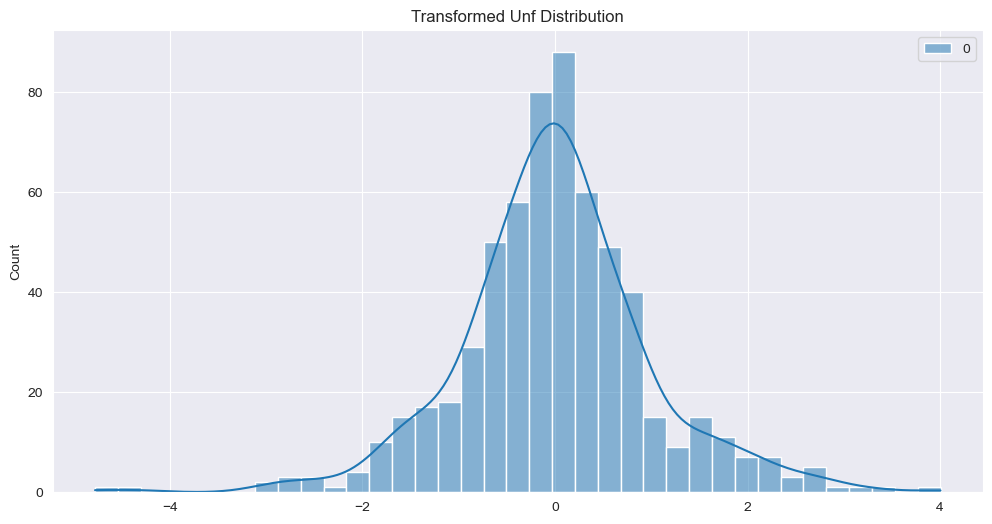

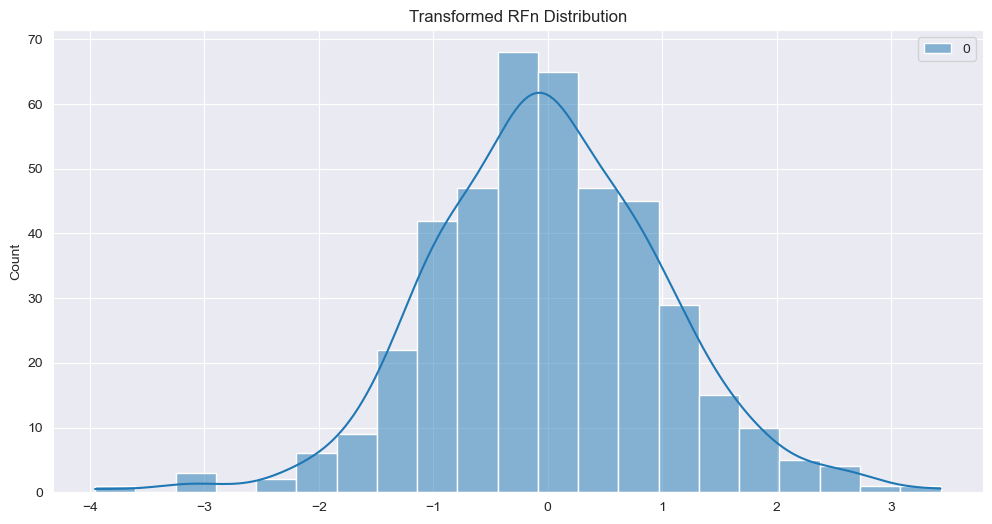

In [9]:
Fin_boxcox, _ = stats.boxcox(Fin)

scaler = StandardScaler()

Fin_normalized = scaler.fit_transform(Fin.values.reshape(-1, 1))
Fin_log_transformed = np.log1p(Fin)  # log1p is used to handle zero values
Fin_boxcox, _ = stats.boxcox(Fin)

pt = PowerTransformer(method='yeo-johnson')
Fin_transformed = pt.fit_transform(Fin.values.reshape(-1, 1))


Unf_normalized = scaler.fit_transform(Unf.values.reshape(-1, 1))
Unf_log_transformed = np.log1p(Unf)  # log1p is used to handle zero values
Unf_boxcox, _ = stats.boxcox(Unf)

pt = PowerTransformer(method='yeo-johnson')
Unf_transformed = pt.fit_transform(Unf.values.reshape(-1, 1))

RFn_normalized = scaler.fit_transform(RFn.values.reshape(-1, 1))
RFn_log_transformed = np.log1p(RFn)  # log1p is used to handle zero values
RFn_boxcox, _ = stats.boxcox(RFn)

pt = PowerTransformer(method='yeo-johnson')
RFn_transformed = pt.fit_transform(RFn.values.reshape(-1, 1))

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(Fin_transformed, kde=True)
plt.title('Transformed Fin Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(Unf_transformed, kde=True)
plt.title('Transformed Unf Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(RFn_transformed, kde=True)
plt.title('Transformed RFn Distribution')
plt.show()

In [11]:
# Equal Variance
RFn_V = np.var(RFn_transformed, axis=0)
Unf_V = np.var(Unf_transformed, axis=0)
Fin_v = np.var(Fin_transformed, axis=0)
print(RFn_V, Unf_V, Fin_v)

[1.] [1.] [1.]


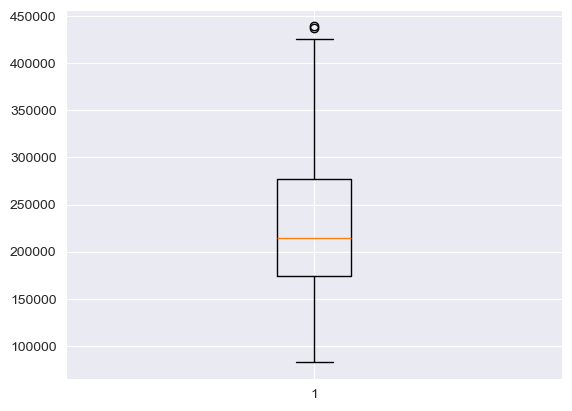

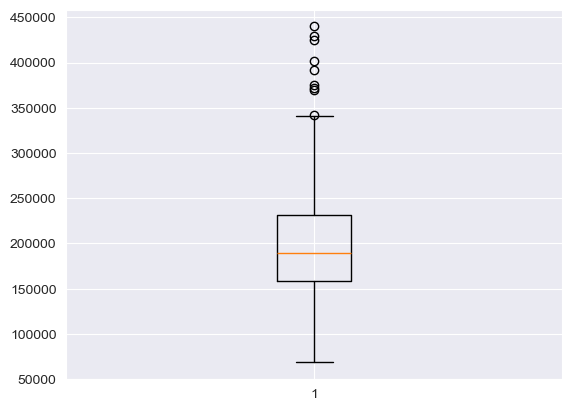

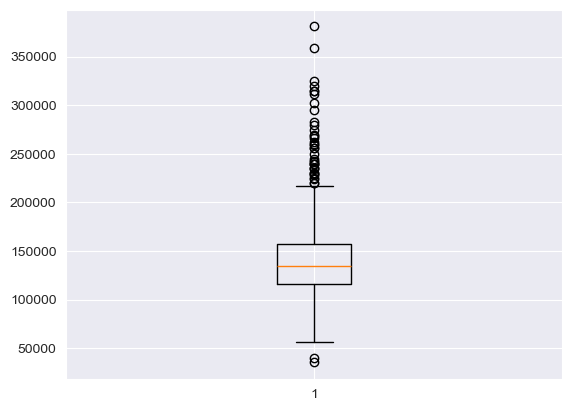